In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [4]:
# from google.colab import files
# uploaded = files.upload()
df = pd.read_excel("data_excel.xlsx")

In [5]:
df

,password,strength,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,kzde5577,1,NaN,NaN,NaN,NaN,NaN
1,kino3434,1,NaN,NaN,NaN,NaN,NaN
2,visi7k1yr,1,NaN,NaN,NaN,NaN,NaN
3,megzy123,1,NaN,NaN,NaN,NaN,NaN
4,lamborghin1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
669874,10redtux10,1,NaN,NaN,NaN,NaN,NaN
669875,infrared1,1,NaN,NaN,NaN,NaN,NaN
669876,184520socram,1,NaN,NaN,NaN,NaN,NaN
669877,marken22a,1,NaN,NaN,NaN,NaN,NaN


<h2 style="font-size: 24px; font-weight: bold;">Data Cleaning</h2>

In [6]:
# Creating df1 by selecting all rows and the first two columns (0th and 1st) from df
df1 = df.iloc[:, 0:2]

In [7]:
df1

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669874,10redtux10,1
669875,infrared1,1
669876,184520socram,1
669877,marken22a,1


In [8]:
df1["strength"].value_counts()

strength
1                            496801
0                             89702
2                             83137
ckrguzel61@hotmail.com            2
komofti34@gmail.com               2
                              ...  
escortcu34@gmail.com              1
iletisim@selimaltin.com           1
demir_06_68@hotmail.com           1
bychatlak_66@hotmail.com          1
efsane.mardinli@gmail.com         1
Name: count, Length: 239, dtype: int64

In [9]:
# removing rows from the DataFrame df1 where the "strength" value is not 0, 1, or 2

strengths = [0,1,2]
lst = []

for index, row in df1.iterrows():
    if row["strength"] not in strengths:
        lst.append(index)

df2 = df1.drop(lst)

In [10]:
df2["strength"].value_counts()

strength
1    496801
0     89702
2     83137
Name: count, dtype: int64

In [11]:
df2.drop_duplicates(inplace = True)

In [12]:
df2.duplicated().sum()

0

In [13]:
df2.isna().any().sum()

1

In [14]:
df2.dropna(inplace = True)

<h2 style="font-size: 24px; font-weight: bold;">Semantic Analysis</h2>

In [15]:
df2.dtypes

password    object
strength    object
dtype: object

In [16]:
type(df2["strength"][0])

int

In [17]:
df2["strength"] = df2["strength"].astype(int)

In [18]:
df2["password"] = df2["password"].astype(str)

In [19]:
df2["password"].str.isnumeric().sum()
# 0 password with only numerics

367

In [20]:
df2["password"].str.isupper().sum()
# all letters are uppercase

10464

In [21]:
df2[df2["password"].str.isupper()]

,password,strength
268,AS0130066,1
269,QWERTY0011,1
323,YADHJIGSAWS11,1
346,IRZA98,0
486,PEPITO00,1
...,...,...
669696,ARNAV_KUSHI,1
669698,36802907A,1
669787,MARLENY2090,1
669795,RHBDJQHJU25,1


In [22]:
df2["password"].str.isalpha().sum()
# only letters

317

In [23]:
df2[df2["password"].str.isalpha()]

,password,strength
231,gtlek,0
4603,trcske,0
6098,jijik,0
6502,piccolo,0
10743,Stphane,0
...,...,...
655665,paoca,0
656282,vntm,0
657812,fuckyou,0
666516,mueco,0


In [24]:
df2["password"].str.isalnum().sum()
# only numbers and letters

650258

In [25]:
df2["password"].str.istitle().sum()
# first emerging letter is capital

6286

In [26]:
df2[df2["password"].str.istitle()]

,password,strength
65,Iamthelegend1!,2
369,Staterkom20081993,2
377,Oshity07142014,2
464,Scipio21152030067254,2
546,1A2Z3E4R,1
...,...,...
669317,Kustyk33935432,2
669395,28091974Zezinho,2
669437,City&Colour241091,2
669471,Codificando10~,2


In [27]:
!pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [28]:
import string

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass
# whether password contains specail character

In [31]:
df2["password"] = df2["password"].astype(str)

In [32]:
(df2["password"].apply(find_semantics)==1).sum()

18408

In [33]:
df2[df2["password"].apply(find_semantics)==1]

,password,strength
20,elyass15@ajilent-ci,2
22,klara-tershina3H,2
44,olmaz.,0
50,ok>bdk,0
60,khmer100.03278&?><Mnb,2
...,...,...
669792,gRAPEHORSE_289,2
669845,Felidae_blckPanther001,2
669857,juanpaganini588@gmail.com,2
669861,weslley.06888524,2


<h2 style="font-size: 24px; font-weight: bold;">Feature Engineering</h2>

In [34]:
# length of password

In [35]:
df2["length"] = df2["password"].str.len()

In [36]:
df2.head()

,password,strength,length
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11


In [37]:
# frequency of lowercase letters

In [38]:
def lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [39]:
df2["lowercase_freq"] = df2["password"].apply(lowercase)

In [40]:
df2.head()

,password,strength,length,lowercase_freq
0,kzde5577,1,8,0.500000
1,kino3434,1,8,0.500000
2,visi7k1yr,1,9,0.777778
3,megzy123,1,8,0.625000
4,lamborghin1,1,11,0.909091


In [41]:
# # frequency of uppercase letters

In [42]:
def uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [43]:
df2["uppercase_freq"] = df2["password"].apply(uppercase)

In [44]:
df2.head()

,password,strength,length,lowercase_freq,uppercase_freq
0,kzde5577,1,8,0.500000,0.0
1,kino3434,1,8,0.500000,0.0
2,visi7k1yr,1,9,0.777778,0.0
3,megzy123,1,8,0.625000,0.0
4,lamborghin1,1,11,0.909091,0.0


In [45]:
# frequency of numeric characters

In [46]:
def digit(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [47]:
df2["digit_freq"] = df2["password"].apply(digit)

In [48]:
df2.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,kzde5577,1,8,0.500000,0.0,0.500000
1,kino3434,1,8,0.500000,0.0,0.500000
2,visi7k1yr,1,9,0.777778,0.0,0.222222
3,megzy123,1,8,0.625000,0.0,0.375000
4,lamborghin1,1,11,0.909091,0.0,0.090909


In [49]:
# frequency of special characters

In [50]:
def special_char(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)/len(row)

In [51]:
df2["special_char_freq"] = df2["password"].apply(special_char)

In [52]:
df2.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,kzde5577,1,8,0.500000,0.0,0.500000,0.0
1,kino3434,1,8,0.500000,0.0,0.500000,0.0
2,visi7k1yr,1,9,0.777778,0.0,0.222222,0.0
3,megzy123,1,8,0.625000,0.0,0.375000,0.0
4,lamborghin1,1,11,0.909091,0.0,0.090909,0.0


In [53]:
df2["lowercase_freq"] = np.round(df2["lowercase_freq"], 3)
df2["uppercase_freq"] = np.round(df2["uppercase_freq"], 3)
df2["digit_freq"] = np.round(df2["digit_freq"], 3)
df2["special_char_freq"] = np.round(df2["special_char_freq"], 3)

In [54]:
df2.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,kzde5577,1,8,0.500,0.0,0.500,0.0
1,kino3434,1,8,0.500,0.0,0.500,0.0
2,visi7k1yr,1,9,0.778,0.0,0.222,0.0
3,megzy123,1,8,0.625,0.0,0.375,0.0
4,lamborghin1,1,11,0.909,0.0,0.091,0.0


<h2 style="font-size: 24px; font-weight: bold;">Data Analysis</h2>

In [55]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(df2[[col, "strength"]].groupby("strength").agg(["min", "max", "mean", "median"]))
    print("\n")

         length                       
            min  max       mean median
strength                              
0             1  257   6.581418    7.0
1             3  263   9.633332    9.0
2            14  220  15.933567   16.0


         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.707486  0.714
1                   0.0  0.923  0.629075  0.667
2                   0.0  0.933  0.422615  0.400


         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012431  0.000
1                   0.0  0.923  0.008466  0.000
2                   0.0  0.905  0.367318  0.429


         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.276304  0.286
1       

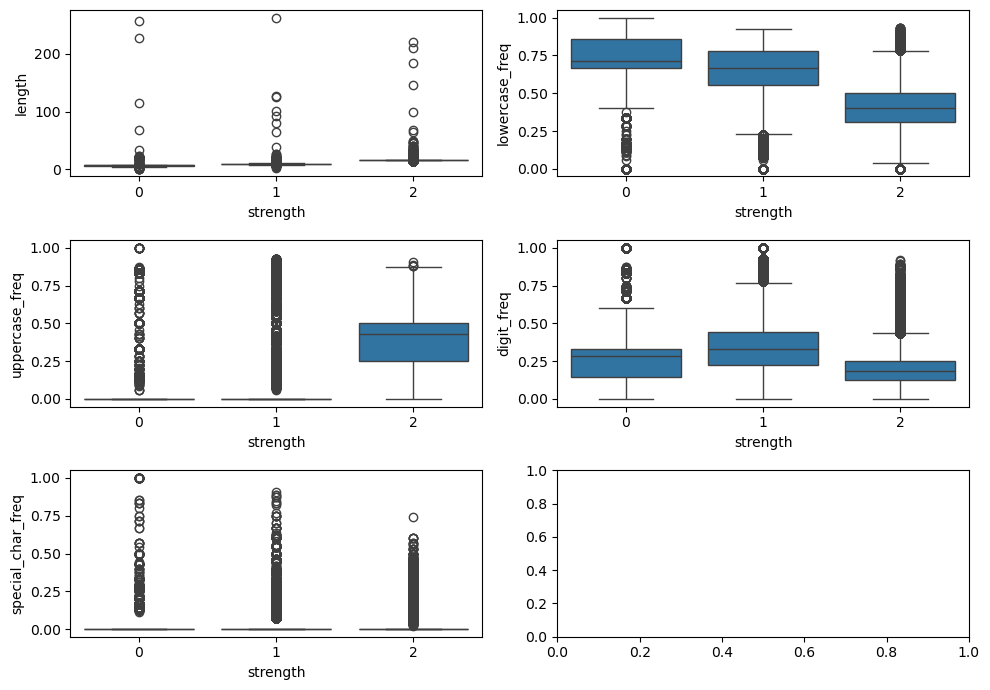

In [56]:
fig, axs = plt.subplots(3, 2, figsize = (10, 7))
sns.boxplot(x = "strength", y = "length", data = df2, ax = axs[0, 0])
sns.boxplot(x = "strength", y = "lowercase_freq", data = df2, ax = axs[0, 1])
sns.boxplot(x = "strength", y = "uppercase_freq", data = df2, ax = axs[1, 0])
sns.boxplot(x = "strength", y = "digit_freq", data = df2, ax = axs[1, 1])
sns.boxplot(x = "strength", y = "special_char_freq", data = df2, ax = axs[2, 0])
plt.tight_layout()

<h2 style="font-size: 24px; font-weight: bold;">Feature Importance</h2>

In [57]:
# checking whether there is difference among feature values across strengths

In [58]:
from scipy import stats

In [59]:
# checking normality of values
# hypothesis testing

cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(stats.shapiro(df2[df2["strength"] == 0][col]))
    print(stats.shapiro(df2[df2["strength"] == 1][col]))
    print(stats.shapiro(df2[df2["strength"] == 2][col]))
    print("\n")

length
ShapiroResult(statistic=0.13346678018569946, pvalue=0.0)
ShapiroResult(statistic=0.7921388149261475, pvalue=0.0)


C:\Users\gulma\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.36070960760116577, pvalue=0.0)


lowercase_freq
ShapiroResult(statistic=0.7327057123184204, pvalue=0.0)
ShapiroResult(statistic=0.8984407782554626, pvalue=0.0)
ShapiroResult(statistic=0.969139575958252, pvalue=0.0)


uppercase_freq
ShapiroResult(statistic=0.11311537027359009, pvalue=0.0)
ShapiroResult(statistic=0.09483146667480469, pvalue=0.0)
ShapiroResult(statistic=0.9332681894302368, pvalue=0.0)


digit_freq
ShapiroResult(statistic=0.8060114979743958, pvalue=0.0)
ShapiroResult(statistic=0.9220196008682251, pvalue=0.0)
ShapiroResult(statistic=0.8338689208030701, pvalue=0.0)


special_char_freq
ShapiroResult(statistic=0.08450573682785034, pvalue=0.0)
ShapiroResult(statistic=0.07249462604522705, pvalue=0.0)
ShapiroResult(statistic=0.3642738461494446, pvalue=0.0)




In [60]:
# data is not normally distributed

In [61]:
# checking homogeneity of variances - Levene's test

for col in cols:
    print(col)
    print(stats.levene(df2[df2["strength"] == 0][col],
                       df2[df2["strength"] == 1][col],
                       df2[df2["strength"] == 2][col]))
    print("\n")

length
LeveneResult(statistic=9919.228199329698, pvalue=0.0)


lowercase_freq
LeveneResult(statistic=5156.779735284323, pvalue=0.0)


uppercase_freq
LeveneResult(statistic=107150.60296328217, pvalue=0.0)


digit_freq
LeveneResult(statistic=14560.071343820744, pvalue=0.0)


special_char_freq
LeveneResult(statistic=6406.998105446732, pvalue=0.0)




In [62]:
# variances are not homogenous - p values is less than 0.05

In [63]:
!pip install pingouin

In [64]:
cols

['length',
 'lowercase_freq',
 'uppercase_freq',
 'digit_freq',
 'special_char_freq']

In [65]:
# checking strength differences by Welch's ANOVA

import pingouin as pg
for col in cols:
    print(col)
    welch_anova = pg.welch_anova(dv = col, between = "strength", data = df2)
    print(welch_anova)
    if welch_anova['p-unc'][0] < 0.05:
        print("Reject the null hypothesis: at least one group mean is different.")
    print("\n")

length
     Source  ddof1          ddof2             F  p-unc       np2
0  strength      2  143774.287227  607457.28158    0.0  0.717237
Reject the null hypothesis: at least one group mean is different.


lowercase_freq
     Source  ddof1          ddof2             F  p-unc       np2
0  strength      2  168414.709629  68577.943741    0.0  0.119572
Reject the null hypothesis: at least one group mean is different.


uppercase_freq
     Source  ddof1         ddof2              F  p-unc       np2
0  strength      2  128975.59056  139478.831643    0.0  0.590248
Reject the null hypothesis: at least one group mean is different.


digit_freq
     Source  ddof1          ddof2             F  p-unc       np2
0  strength      2  185120.389544  52269.500074    0.0  0.082965
Reject the null hypothesis: at least one group mean is different.


special_char_freq
     Source  ddof1          ddof2            F  p-unc      np2
0  strength      2  128091.817183  2930.680474    0.0  0.01878
Reject the null 

In [66]:
# all features are significant

In [67]:
pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [68]:
from scikit_posthocs import posthoc_tamhane

for col in cols:
    print(col)
    print(posthoc_tamhane(df2, val_col = col, group_col = "strength"))
    print("\n")

length
     1    2    0
1  1.0  0.0  0.0
2  0.0  1.0  0.0
0  0.0  0.0  1.0


lowercase_freq
     1    2    0
1  1.0  0.0  0.0
2  0.0  1.0  0.0
0  0.0  0.0  1.0


uppercase_freq
     1    2    0
1  1.0  0.0  0.0
2  0.0  1.0  0.0
0  0.0  0.0  1.0


digit_freq
     1    2    0
1  1.0  0.0  0.0
2  0.0  1.0  0.0
0  0.0  0.0  1.0


special_char_freq
     1    2    0
1  1.0  0.0  0.0
2  0.0  1.0  0.0
0  0.0  0.0  1.0




<span style="font-size: 24px; font-weight: bold;">Testing without NLP</span>

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop(["strength", "password"], axis = 1), df2["strength"], train_size=0.8)

In [70]:
df2.dtypes

password              object
strength               int32
length                 int64
lowercase_freq       float64
uppercase_freq       float64
digit_freq           float64
special_char_freq    float64
dtype: object

In [69]:
numeric_df = df2.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                   strength    length  lowercase_freq  uppercase_freq  \
strength           1.000000  0.810732       -0.321943        0.569289   
length             0.810732  1.000000       -0.278924        0.580268   
lowercase_freq    -0.321943 -0.278924        1.000000       -0.480536   
uppercase_freq     0.569289  0.580268       -0.480536        1.000000   
digit_freq        -0.093527 -0.159996       -0.729928       -0.235774   
special_char_freq  0.089109  0.160344       -0.089906       -0.006533   

                   digit_freq  special_char_freq  
strength            -0.093527           0.089109  
length              -0.159996           0.160344  
lowercase_freq      -0.729928          -0.089906  
uppercase_freq      -0.235774          -0.006533  
digit_freq           1.000000          -0.036697  
special_char_freq   -0.036697           1.000000  


In [70]:
import re

models = [LogisticRegression(penalty = "l2", C = 0.1, class_weight = "balanced", solver = "sag", multi_class = "multinomial", random_state = 42),
          RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, class_weight='balanced', random_state=42),
          GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)]


saved_models = {}  # Dictionary to store each trained model

def printMetrics(y, y_pred, name, model):
    class_report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)

    model_name = re.search('^[^(]+', name).group(0)
    saved_models[model_name] = model  # Save the trained model

    print(name)
    print()
    print('Classification Report')
    print(class_report)
    print()
    print('Confusion Matrix')
    print(conf_matrix)
    print()

# Train each model and evaluate metrics
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    printMetrics(Y_test, y_pred, str(model), model)

C:\Users\gulma\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial',
                   random_state=42, solver='sag')

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17838
           1       1.00      0.99      1.00     99443
           2       0.96      1.00      0.98     16625

    accuracy                           0.99    133906
   macro avg       0.99      1.00      0.99    133906
weighted avg       0.99      0.99      0.99    133906


Confusion Matrix
[[17753    51    34]
 [    0 98749   694]
 [    0     0 16625]]

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17838
           1       1.00      1.00      1.00     99443
           2       1.00      1.00      1.00     16625

   

<span style="font-size: 24px; font-weight: bold;">Apply NLP</span>

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# vectorizer = TfidfVectorizer(analyzer = "char", lowercase = False)

In [ ]:
# vectorized_Xtrain = vectorizer.fit_transform(X_train["password"])

In [ ]:
# vectorized_Xtrain.shape

In [ ]:
# X_train.shape

In [ ]:
# vectorized_Xtrain.toarray().shape

In [ ]:
# X_test

In [ ]:
# vectorized_Xtrain.toarray()

In [ ]:
# final_Xtrain = np.hstack((X_train.drop("password", axis = 1), vectorized_Xtrain.toarray()))

In [ ]:
# final_Xtrain.shape

In [ ]:
# vectorized_Xtest = vectorizer.transform(X_test["password"])

In [ ]:
# vectorized_Xtest.shape

In [ ]:
# X_test.shape

In [ ]:
# final_Xtest = np.hstack((X_test.drop("password", axis = 1), vectorized_Xtest.toarray()))

In [ ]:
# final_Xtest.shape

<h2 style="font-size: 24px; font-weight: bold;">Logistic Regression</h2>

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(penalty = "l1", C = 0.1, class_weight = "balanced", multi_class = "multinomial", solver = "saga")

In [73]:
model.fit(X_train, Y_train)

C:\Users\gulma\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial',
                   penalty='l1', solver='saga')

In [74]:
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
print(confusion_matrix(Y_test, y_pred))

[[17701    99    38]
 [    0 98541   902]
 [    0     3 16622]]


In [77]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17838
           1       1.00      0.99      0.99     99443
           2       0.95      1.00      0.97     16625

    accuracy                           0.99    133906
   macro avg       0.98      0.99      0.99    133906
weighted avg       0.99      0.99      0.99    133906



In [83]:
# def predict():
#     password = input("Password: ")
#     vectorzed_features = vectorizer.transform([password]).toarray()
#     def lowercase_pred(row):
#         return len([char for char in row if char.islower()])/len(row)
#     def uppercase_pred(row):
#         return len([char for char in row if char.isupper()])/len(row)
#     def digit_pred(row):
#         return len([char for char in row if char.isdigit()])/len(row)
#     def special_char_pred(row):
#         special_chars = []
#         for char in row:
#             if not char.isalpha() and not char.isdigit():
#                 special_chars.append(char)
#         return len(special_chars)/len(row)

#     length = len(password)
#     lower = lowercase_pred(password)
#     upper = uppercase_pred(password)
#     digit_freq = digit_pred(password)
#     special = special_char_pred(password)
#     original_features = np.array([[length, lower, upper, digit_freq, special]])
#     passdata = np.hstack((original_features, vectorzed_features))

#     result = model.predict(passdata)
#     if result == 0 :
#         return "Password is weak"
#     elif result == 1 :
#         return "Password is normal"
#     else:
#         return "password is strong"

In [84]:
# predict()

In [85]:

#import re

#def predict():
    #password = input("Password: ")

    # Şifrə zəifdir: Kiçik hərflər varsa
    #if any(char.islower() for char in password):
        #return "Password is weak"

    # Şifrə zəifdir: Ardıcıl rəqəmlər varsa
    #if re.search(r"(012|123|234|345|456|567|678|789|890)", password):
        #return "Password is weak"

    # Əgər şərtlərə uyğun deyilsə, vektorlaşdırma və model proqnozlaşdırması davam edir
    #vectorized_features = vectorizer.transform([password]).toarray()

    #def lowercase_pred(row):
       # return len([char for char in row if char.islower()]) / len(row)

    #def uppercase_pred(row):
       # return len([char for char in row if char.isupper()]) / len(row)

    #def digit_pred(row):
       # return len([char for char in row if char.isdigit()]) / len(row)

    #def special_char_pred(row):
     #   special_chars = [char for char in row if not char.isalpha() and not char.isdigit()]
      #  return len(special_chars) / len(row)

    # Xüsusiyyətləri hesablayırıq
    #length = len(password)
    #lower = lowercase_pred(password)
    #upper = uppercase_pred(password)
    #digit_freq = digit_pred(password)
    #special = special_char_pred(password)
    #original_features = np.array([[length, lower, upper, digit_freq, special]])
    #passdata = np.hstack((original_features, vectorized_features))

    # Model nəticəni təxmin edir
    #result = model.predict(passdata)

    #if result == 0:
     #   return "Password is weak"
    #elif result == 1:
     #   return "Password is normal"
    #else:
     #   return "Password is strong"


In [86]:
#import pickle

In [87]:
#with open("vectorizer.pkl", "wb") as vec_file:
    #pickle.dump(vectorizer, vec_file)

In [88]:
#with open("model.pkl", "wb") as model_file:
    #pickle.dump(model, model_file)


<h2><strong>Random Forest</strong></h2>

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [79]:
model=RandomForestClassifier(n_estimators=100, random_state=42)

In [80]:
Random_forest_class=model.fit(X_train, Y_train)


In [81]:
predict_y=Random_forest_class.predict(X_test)

In [82]:
accuracy = accuracy_score(Y_test, predict_y)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


<h2><strong>Catboost</strong></h2>


In [70]:
!pip install catboost


In [71]:
from catboost import CatBoostClassifier


In [72]:
catboost_clf=CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')


In [73]:
Catboost_class=catboost_clf.fit(X_train, Y_train)

0:	learn: 0.9092368	total: 298ms	remaining: 29.5s
1:	learn: 0.7689255	total: 402ms	remaining: 19.7s
2:	learn: 0.6593225	total: 501ms	remaining: 16.2s
3:	learn: 0.5710138	total: 588ms	remaining: 14.1s
4:	learn: 0.4980927	total: 693ms	remaining: 13.2s
5:	learn: 0.4369571	total: 811ms	remaining: 12.7s
6:	learn: 0.3850841	total: 952ms	remaining: 12.6s
7:	learn: 0.3406392	total: 1.1s	remaining: 12.7s
8:	learn: 0.3022973	total: 1.25s	remaining: 12.7s
9:	learn: 0.2689161	total: 1.41s	remaining: 12.7s
10:	learn: 0.2397887	total: 1.58s	remaining: 12.8s
11:	learn: 0.2142149	total: 1.77s	remaining: 13s
12:	learn: 0.1917024	total: 1.95s	remaining: 13.1s
13:	learn: 0.1717973	total: 2.14s	remaining: 13.1s
14:	learn: 0.1541598	total: 2.29s	remaining: 13s
15:	learn: 0.1385008	total: 2.46s	remaining: 12.9s
16:	learn: 0.1245582	total: 2.63s	remaining: 12.9s
17:	learn: 0.1121350	total: 2.82s	remaining: 12.8s
18:	learn: 0.1010357	total: 3s	remaining: 12.8s
19:	learn: 0.0910716	total: 3.18s	remaining: 12.7

In [74]:
catboost_predict=Catboost_class.predict(X_test)

In [75]:
accuracy_catboost = accuracy_score(Y_test, catboost_predict)
print(f"CatBoost Accuracy: {accuracy_catboost:.2f}")

CatBoost Accuracy: 1.00


In [76]:
with open("cat_boost_model.pkl", "wb") as model_file:
    pickle.dump(Catboost_class, model_file)

NameError: name 'pickle' is not defined

<h2>AdaBoost with a Decision Tree Classifier as the base estimator</h2>


In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [77]:
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Use 'estimator' instead of 'base_estimator'
    n_estimators=50,
    learning_rate=1.0,
    random_state=42)

In [78]:
adaboost_clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [79]:
adaboost_predict=adaboost_clf.predict(X_test)

In [80]:
accuracy_adaboost = accuracy_score(Y_test, adaboost_predict)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.2f}")

AdaBoost Accuracy: 0.82


In [85]:
!pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/11.0 MB 563.7 kB/s eta 0:00:20
    --------------------------------------- 0.1/11.0 MB 853.3 kB/s eta 0:00:13
    --------------------------------------- 0.3/11.0 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.0 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.0 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.0 MB 2.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.0 MB 5.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/11.0 MB 6.4 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 8.2 MB/s eta 0:00:01
   ----

  You can safely remove it manually.


In [86]:
with open("ada_boost_model.pkl", "wb") as model_file:
    pickle.dump(adaboost_clf, model_file)

<h2>Confusion Matrix</h2>


In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [95]:
CM=confusion_matrix(Y_test, predict_y)

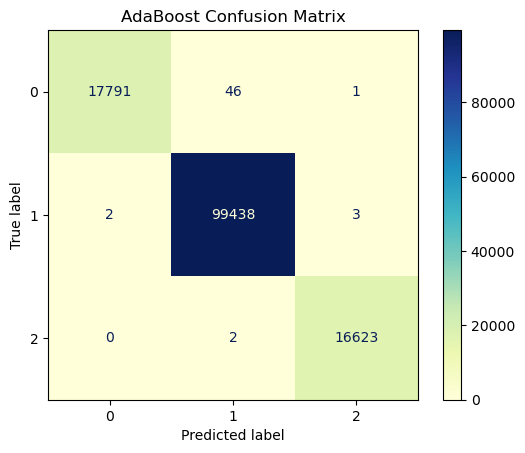

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
disp.plot(cmap="YlGnBu")
plt.title("AdaBoost Confusion Matrix")
plt.show()

<h2>SHAP</h2>

In [97]:
!pip install shap


In [1]:
import shap

In [2]:
explainer = shap.Explainer(Catboost_class, X_train)

user_password = input("Please enter your password: ")
user_data = {
    "length": len(user_password),
    "lowercase_freq": lowercase(user_password),
    "uppercase_freq": uppercase(user_password),
    "digit_freq": digit(user_password),
    "special_char_freq": special_char(user_password)
}

single_data_point = pd.DataFrame([user_data])

shap_values = explainer(single_data_point)

shap.waterfall_plot(shap_values[0])

NameError: name 'Catboost_class' is not defined

Gradient Boosting Machines (GBM)


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gbm_model=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [107]:
gradient_boost_class=gbm_model.fit(X_train, Y_train)

In [116]:
gbm_predict = gradient_boost_class.predict(X_test)

In [117]:
accuracy = accuracy_score(Y_test, gbm_predict)
print(f'GBM Accuracy: {accuracy:.2f}')

GBM Accuracy: 1.00


Support Vector Machine (SVM)

In [118]:
from sklearn.svm import SVC

In [119]:
model=SVC(kernel='linear', C=1.0)

In [ ]:
svc=model.fit(X_train, Y_train)

In [ ]:
svc_pred=svc.predict(final_Xtest)

In [ ]:
accuracy = accuracy_score(Y_test, svc_pred)
print(f'SVC Accuracy: {accuracy:.2f}')


In [ ]:
#with open("vectorizer.pkl", "wb") as vec_file:
 # pickle.dump(vectorizer, vec_file)

In [ ]:
#with open("model.pkl", "rb") as model_file:
   #loaded_model = pickle.load(model_file)

In [ ]:
#y_pred_loaded = loaded_model.predict(final_Xtest)